# Hands on: quantum teleportation with PennyLane

##  https://bit.ly/38PVFwO

In [ ]:
!pip install pennylane

In [2]:
import pennylane as qml

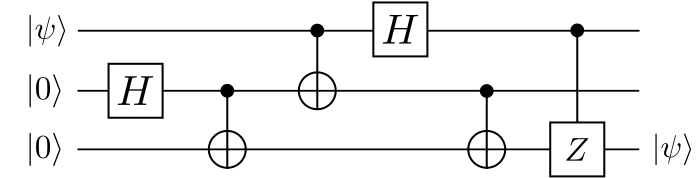

In [3]:
def prepare_state():
    qml.RX(2.0, wires=0)    

def create_entangled_state():
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1, 2])

def basis_rotation():
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)

def apply_controlled_operations():
    qml.CNOT(wires=[1, 2])
    qml.CZ(wires=[0, 2])

def teleportation():
    prepare_state()
    create_entangled_state()
    basis_rotation()
    apply_controlled_operations()
    return qml.probs(wires=2)

In [4]:
dev = qml.device("default.qubit", wires=3)
qnode = qml.QNode(teleportation, dev)

In [5]:
qnode()

tensor([0.29192658, 0.70807342], requires_grad=True)

In [6]:
def check_the_state():
    prepare_state()
    return qml.probs(wires=0)

check_qnode = qml.QNode(check_the_state, dev)

In [7]:
check_qnode()

tensor([0.29192658, 0.70807342], requires_grad=True)